#Homework Assignment 9

Dataset: https://health.data.ny.gov/Health/Deer-Tick-Surveillance-Nymphs-May-to-Sept-excludin/kibp-u2ip/data

The dataset contains data on the collection and testing of blacklegged tick nymphs
over a 15-year period (from 2008 to 2022) in the months of May to
September, in New York State. New York State consists of 62 counties
(autonomous regions). The collection took place at various locations in selected counties, with the exception of New York City. The study areas were selected based on several factors - the intention was to select locations where the public could spend time hiking, hunting, or camping. Ticks were captured in by coming into contact with a piece of cloth that was dragged along the ground and after
surrounding vegetation.

### Loading the dataset

In [154]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [155]:
data = pd.read_csv("deer_tick_surveillance.csv", sep=",")

### Exploratory Analysis

In [156]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539 entries, 0 to 538
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     539 non-null    int64  
 1   County                   539 non-null    object 
 2   Total Sites Visited      539 non-null    int64  
 3   Total Ticks Collected    539 non-null    int64  
 4   Tick Population Density  538 non-null    float64
 5   Total Tested             539 non-null    int64  
 6   B. burgdorferi (%)       490 non-null    float64
 7   A. phagocytophilum (%)   490 non-null    float64
 8   B. microti (%)           490 non-null    float64
 9   B. miyamotoi (%)         338 non-null    float64
 10  County Centroid          539 non-null    object 
dtypes: float64(5), int64(4), object(2)
memory usage: 46.4+ KB


We can see that some ticks have been tested only for some of the diseases (almost half of the data do not include the value of the test for the B. miyamotoi disease)

In [177]:
print(data.isnull().sum())

Year                         0
County                       0
n                            0
y                            0
Tick Population Density      1
t                            0
B. burgdorferi (%)          49
A. phagocytophilum (%)      49
B. microti (%)              49
B. miyamotoi (%)           201
County Centroid              0
dtype: int64


In [158]:
data.describe()

,Year,Total Sites Visited,Total Ticks Collected,Tick Population Density,Total Tested,B. burgdorferi (%),A. phagocytophilum (%),B. microti (%),B. miyamotoi (%)
count,539.000000,539.000000,539.000000,538.000000,539.000000,490.000000,490.000000,490.000000,338.000000
mean,2016.198516,2.549165,212.955473,28.795428,54.202226,22.471224,3.800816,3.040612,0.883432
std,3.813437,2.419502,718.183814,64.751956,61.446851,13.949799,5.345942,5.723496,1.958522
min,2008.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2014.000000,1.000000,20.500000,3.345000,10.000000,14.000000,0.000000,0.000000,0.000000
50%,2016.000000,2.000000,80.000000,14.100000,50.000000,22.600000,2.000000,0.000000,0.000000
75%,2019.000000,3.000000,164.500000,31.375000,60.500000,30.000000,6.000000,3.825000,1.375000
max,2022.000000,27.000000,8516.000000,1220.000000,454.000000,100.000000,50.000000,38.000000,20.000000


First, we will focus on the number of collected ticks with respect to the number of visited sites.

In [159]:
data.rename(columns={"Total Ticks Collected": "y",
                     "Total Sites Visited": "n",
                     "Total Tested": "t"}, inplace=True)

data['Year'] = data['Year'].astype('category')

We can group the data by the 'Year' column and have a look at some summary statistics.

In [160]:
dat = (
    data.assign(y_tmp=data['y'])
    .groupby('Year', as_index=False, observed=False)
    .agg(
        y=('y_tmp', 'sum'),
        n=('n', 'sum'),
        min_y=('y_tmp', 'min'),
        q1_y=('y_tmp', lambda x: np.quantile(x, 0.25)),
        median=('y_tmp', 'median'),
        mean=('y_tmp', 'mean'),
        q3_y=('y_tmp', lambda x: np.quantile(x, 0.75)),
        max_y=('y_tmp', 'max')
    )
)
dat['MLE'] = dat['y'] / dat['n'].round(3)

print(dat.to_string(index=False))

Year     y   n  min_y  q1_y  median       mean   q3_y  max_y        MLE
2008  3115  17      6 54.00   137.5 194.687500 241.00   1094 183.235294
2009  2524  26      0 14.25   114.0 126.200000 234.00    331  97.076923
2010  1802  21      0 52.50    60.0  94.842105 112.50    522  85.809524
2011  1262  18     32 53.00    63.0  74.235294  71.00    188  70.111111
2012  1290  25      0 10.00    55.0  61.428571  79.00    220  51.600000
2013  4163  55      0 17.75    84.0 138.766667 144.00   1334  75.690909
2014  3633 117      0  0.00    29.5  69.865385 112.25    389  31.051282
2015  5879 130      0 10.00    59.5 122.479167 159.75    628  45.223077
2016  4613 154      0  3.50    50.0  90.450980 129.50   1273  29.954545
2017 11344 178      0 25.00    74.0 214.037736 177.00   2600  63.730337
2018 14748 119      0 15.75    96.5 351.142857 181.50   7439 123.932773
2019 20692 169      0 71.75   117.0 431.083333 347.00   8309 122.437870
2020  8070 118      1 78.00   140.5 237.352941 282.00    991  68

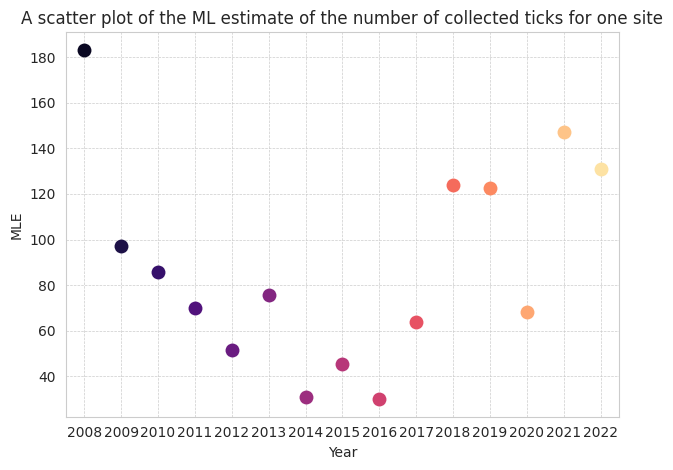

In [161]:
sns.set_style("whitegrid")

sns.stripplot(
    data=dat,
    x='Year',
    y='MLE',
    hue='Year',
    palette='magma',
    size=10,
    legend=False
)
plt.grid(True, which='both', axis='both', linestyle='--', linewidth=0.5)
plt.title("A scatter plot of the ML estimate of the number of collected ticks for one site")
plt.xlabel("Year")
plt.ylabel("MLE")
plt.tight_layout()

plt.show()

The table and the plot above show a changing trend in the number of captures ticks. While their estimated number for one area between 2008 and 2016 was decreasing, after 2016 the opposite is predominantly increasing.

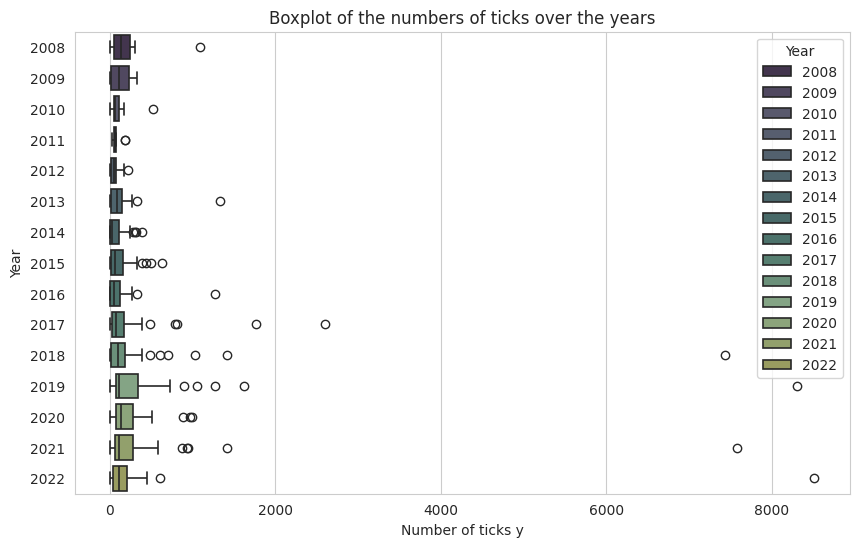

In [162]:
plt.figure(figsize=(10, 6))

sns.boxplot(
    data=data,
    y='Year',
    x='y',
    hue='Year',
    palette='viridis',
    showfliers=True,
    linewidth=1.2,
    saturation=0.3
)

plt.title("Boxplot of the numbers of ticks over the years")
plt.xlabel("Number of ticks y")
plt.ylabel("Year")

plt.show()

We can visualize a more detailed plot without the outliers, too.

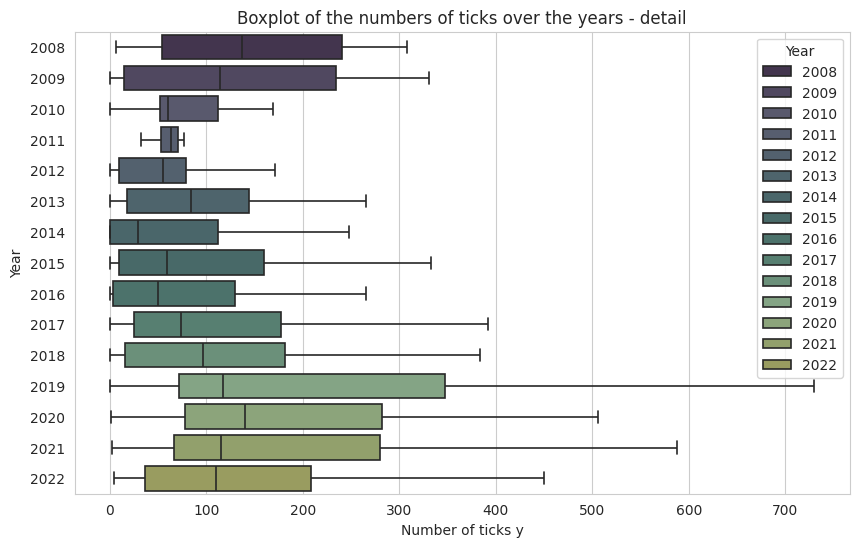

In [163]:
plt.figure(figsize=(10, 6))

sns.boxplot(
    data=data,
    y='Year',
    x='y',
    hue='Year',
    palette='viridis',
    showfliers=False,
    linewidth=1.2,
    saturation=0.3
)

plt.title("Boxplot of the numbers of ticks over the years - detail")
plt.xlabel("Number of ticks y")
plt.ylabel("Year")

plt.show()

From the plot below we can see that the number of visited sites was not consistent over the period. More recent records predominantly contain data with a larger range of selection.

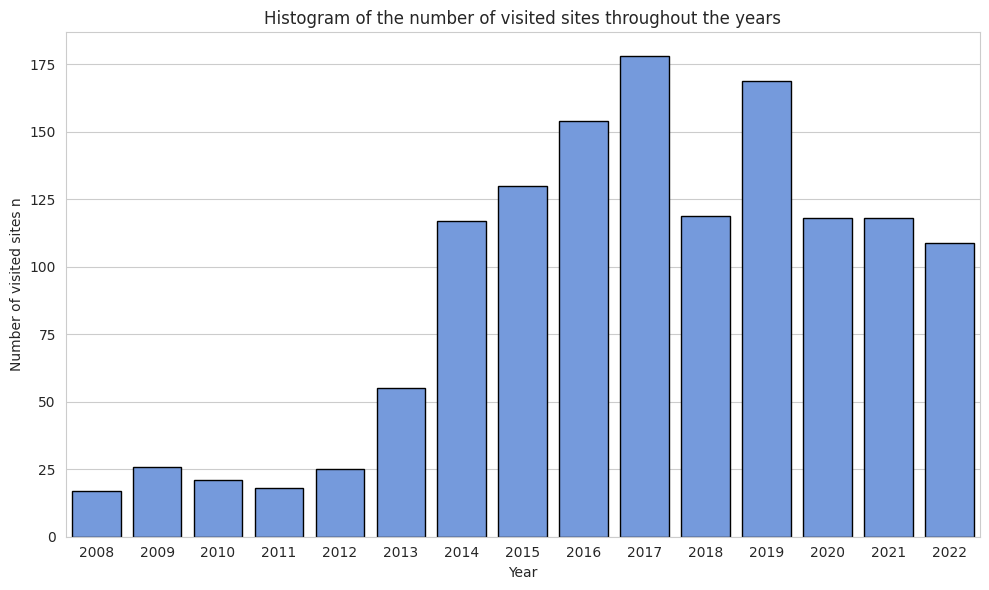

In [164]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=dat,
    x='Year',
    y='n',
    color='cornflowerblue',
    edgecolor='black'
)

plt.title("Histogram of the number of visited sites throughout the years")
plt.xlabel("Year")
plt.ylabel("Number of visited sites n")

plt.tight_layout()

plt.show()

Now, let's focus on the features contatining data about the testing for inidividual diseases.

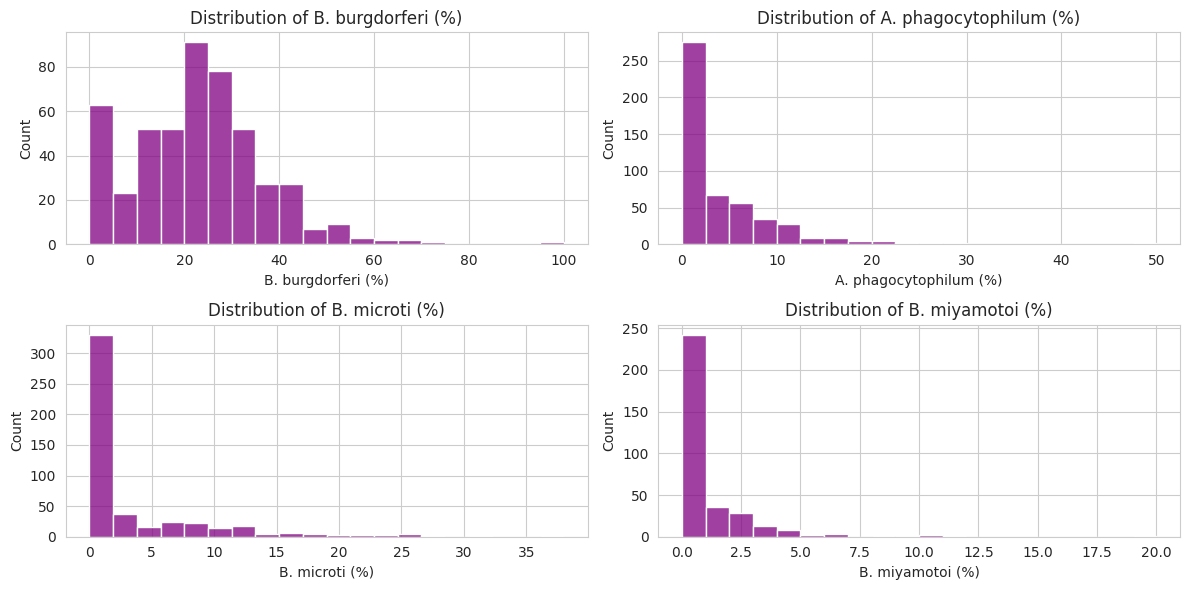

In [165]:
plt.figure(figsize=(12, 6))
for i, disease in enumerate(['B. burgdorferi (%)', 'A. phagocytophilum (%)', 'B. microti (%)', 'B. miyamotoi (%)'], 1):
    plt.subplot(2, 2, i)
    sns.histplot(data[disease], color='purple', bins=20)
    plt.title(f"Distribution of {disease}")
plt.tight_layout()
plt.show()

We can also focus on the prevalence of diseases over time. From the plots below the trend seems to be increasing in general.

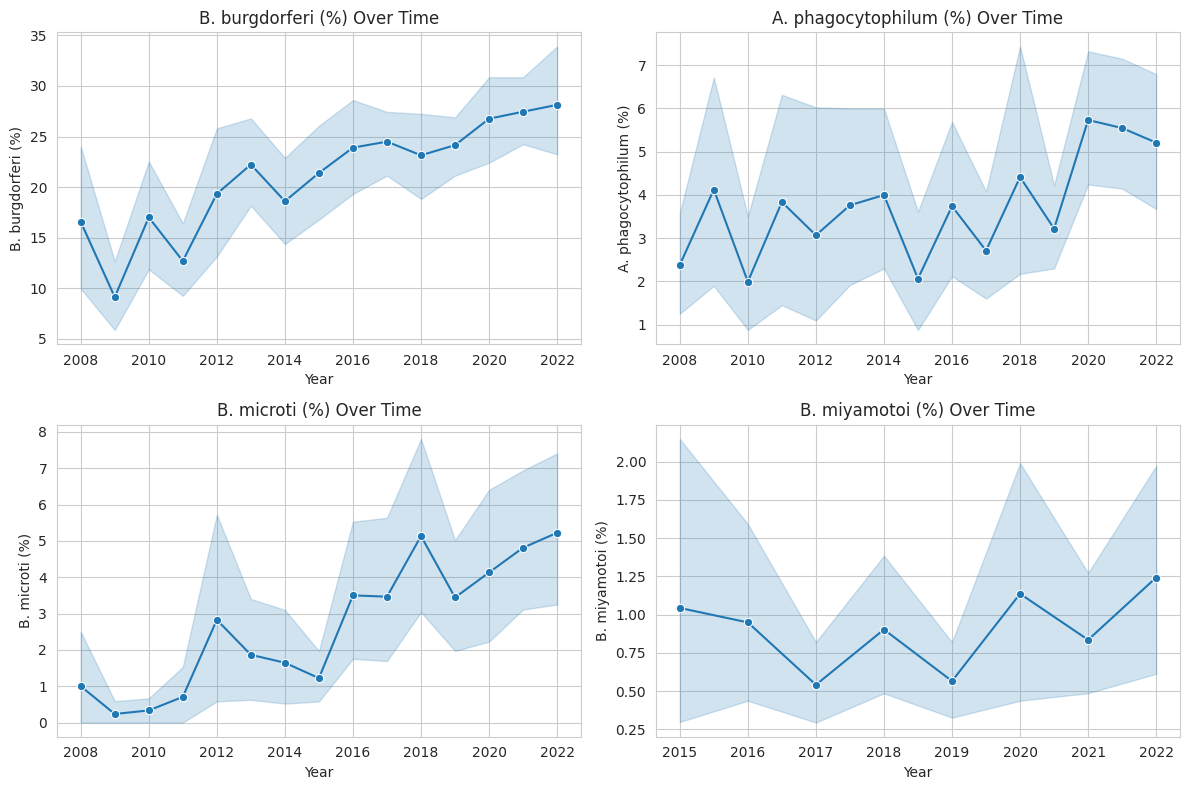

In [166]:
plt.figure(figsize=(12, 8))
for i, disease in enumerate(['B. burgdorferi (%)', 'A. phagocytophilum (%)', 'B. microti (%)', 'B. miyamotoi (%)'], 1):
    plt.subplot(2, 2, i)
    sns.lineplot(data=data, x='Year', y=disease, marker='o')
    plt.title(f"{disease} Over Time")
plt.tight_layout()
plt.show()

Is there a correlation between the prevalence of the individual diseases?

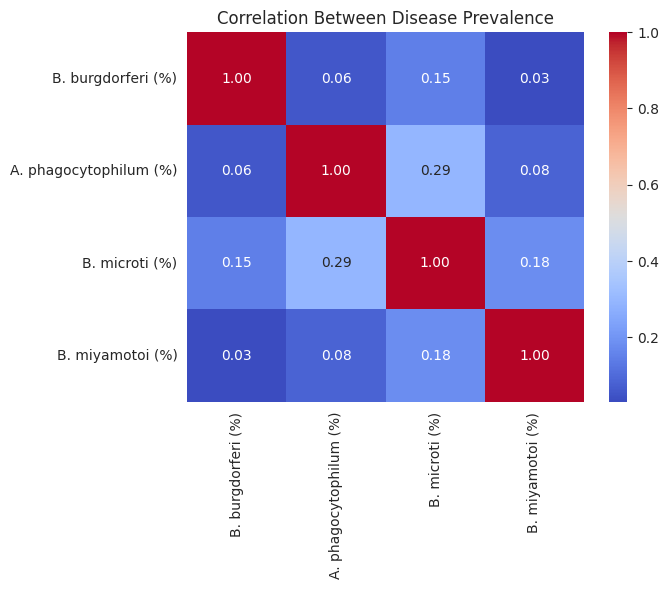

In [175]:
corr = data[['B. burgdorferi (%)', 'A. phagocytophilum (%)', 'B. microti (%)', 'B. miyamotoi (%)']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Between Disease Prevalence")
plt.show()